In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import pyneb as pn

In [8]:
print(pn.__version__)

1.1.13b1


In [9]:
help(pn)

Help on package pyneb:

NAME
    pyneb - PyNeb - python package for the analysis of emission lines

PACKAGE CONTENTS
    core (package)
    extinction (package)
    plot (package)
    sample_scripts (package)
    test (package)
    utils (package)
    version

DATA
    __all__ = []
    __info__ = 'PyNeb version: 1.1.13b1.\nPyNeb is cited using: L... and h...
    __pyversion__ = 3

VERSION
    1.1.13b1

FILE
    /Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/__init__.py




In [10]:
pn.

SyntaxError: invalid syntax (<ipython-input-10-3b5bccbf3e69>, line 1)

Have a look at the web page: https://github.com/Morisset/PyNeb_devel

Manuals: https://github.com/Morisset/PyNeb_devel/tree/master/docs

# The Atom object

In [11]:
help(pn.Atom)

Help on class Atom in module pyneb.core.pynebcore:

class Atom(builtins.object)
 |  Atom(elem=None, spec=None, atom=None, OmegaInterp='Linear', noExtrapol=False, NLevels=None)
 |  
 |  Define the atom object, fill it with data, explore the data, and 
 |  compute quantities such as level populations and line emissivities.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, elem=None, spec=None, atom=None, OmegaInterp='Linear', noExtrapol=False, NLevels=None)
 |      Atom constructor
 |      
 |      Parameters:
 |          - elem          symbol of the selected element
 |          - spec          ionization stage in spectroscopic notation (I = 1, II = 2, etc.)
 |          - atom          ion (e.g. 'O3').
 |          - OmegaInterp   one of ('Cheb', 'Linear'). Default is Linear. "Cheb" works only for fits files. 
 |          - noExtrapol    if set to False (default), Omega will be extrapolated above and below
 |                          the highest and lowest temperatures where it is d

In [12]:
O3 = pn.Atom('O',3)
print(O3)

Atom O3 from o_iii_atom_FFT04-SZ00.dat and o_iii_coll_SSB14.dat


In [13]:
O3.printSources()
print('gs:', O3.gs)
print('IP:', O3.IP)
print('IP upper:', O3.IP_up)
print('Type: ', O3.type)

O3: A values for 4-2 and 4-3: Storey and Zeippen 2000, 312, 813: 
O3: A-values from all levels: Froese Fischer et al 2004, ADNDT 87, 1: 
O3: Energy levels: 
    Ref. 7288 of NIST 2014 (try this: http://physics.nist.gov/cgi-bin/ASBib1/get_ASBib_ref.cgi?db=el&db_id=7288&comment_code=&element=O&spectr_charge=3&): 
O3: Collision strengths: Storey, P. J., Sochi, T., & Badnell, N. R. 2014, MNRAS, 441, 3028: 
gs: p2
IP: 35.12111
IP upper: 54.93554
Type:  coll


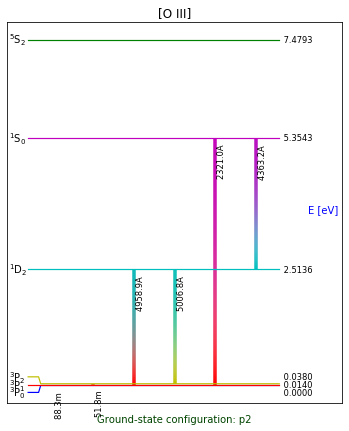

In [14]:
f, ax = plt.subplots(figsize=(6,7))
O3.plotGrotrian(ax=ax)

In [15]:
N2 = pn.Atom('N',2)
S2 = pn.Atom('S',2)

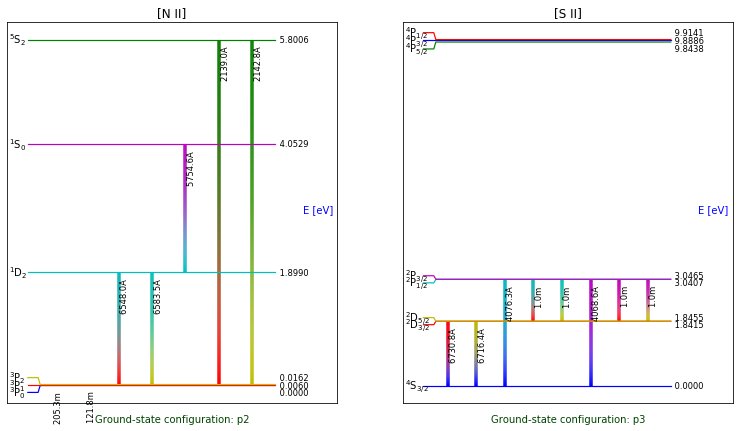

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,7))
N2.plotGrotrian(ax=ax1)
S2.plotGrotrian(ax=ax2)

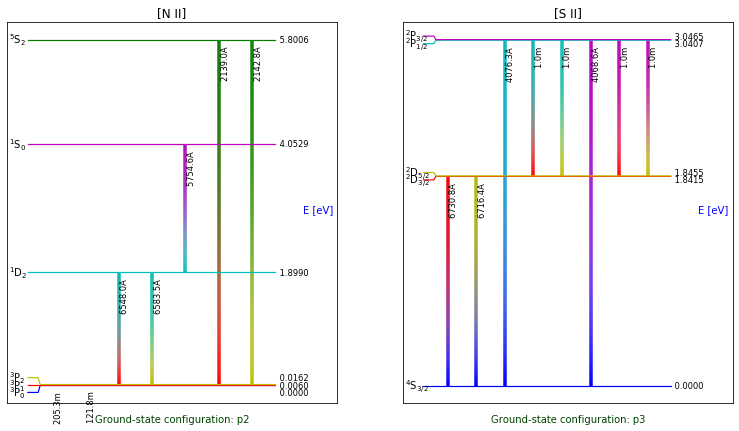

In [17]:
S2 = pn.Atom('S',2, NLevels=5)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,7))
N2.plotGrotrian(ax=ax1)
S2.plotGrotrian(ax=ax2)

In [18]:
O3.printIonic()

elem = O
spec = 3

warng Atom O3: Cannot print populations as tem or den is missing
warng Atom O3: Cannot print critical densities as tem is missing
     88.33m 
    (2-->1) 


     32.65m      51.80m 
    (3-->1)     (3-->2) 


   4931.23A    4958.91A    5006.84A 
    (4-->1)     (4-->2)     (4-->3) 


   2314.87A    2320.95A    2331.40A    4363.21A 
    (5-->1)     (5-->2)     (5-->3)     (5-->4) 




In [19]:
O3.printIonic(tem=1e4, den=1e2)

elem = O
spec = 3
temperature = 10000.0 K
density =  100.0 cm-3

Level   Populations  Critical densities
Level 1:  7.816E-01  0.000E+00
Level 2:  1.939E-01  5.009E+02
Level 3:  2.448E-02  3.530E+03
Level 4:  4.309E-06  6.912E+05
Level 5:  2.972E-10  2.423E+07

     88.33m 
    (2-->1) 
  1.132E-21 

     32.65m      51.80m 
    (3-->1)     (3-->2) 
  4.512E-28   9.040E-22 

   4931.23A    4958.91A    5006.84A 
    (4-->1)     (4-->2)     (4-->3) 
  4.030E-25   1.172E-21   3.497E-21 

   2314.87A    2320.95A    2331.40A    4363.21A 
    (5-->1)     (5-->2)     (5-->3)     (5-->4) 
  0.000E+00   5.734E-24   1.771E-26   2.279E-23 

# H-beta volume emissivity:
1.235E-25 N(H+) * N(e-)  (erg/s)


### For lines issued from the same level, which are the ones which will be the strongest? Does this depends on Te? Ne?

In [20]:
O3.printTransition(5007)

Input wave: 5007.0
Closest wave found: 5006.8
Relative error: 3E-05 
Transition: 4 -> 3


### Compute the emissivities of all these lines between 1000 and 30000 K, at a density of ne= 100 cm$^{-3}$, and plot them. 

In [21]:
O3.getEmissivity(tem=1e4, den=1e2, wave=5007)

array(3.49707371e-21)

In [22]:
O3.getEmissivity(tem=1e4, den=1e2, lev_i=4, lev_j=3)

array(3.49707371e-21)

In [23]:
tem = np.linspace(1e4, 1.2e4, 10)
den = np.logspace(2, 4, 10)
O3.getEmissivity(tem=tem, den=den, wave=5007)

array([[3.49707371e-21, 3.50583226e-21, 3.51688004e-21, 3.52960722e-21,
        3.54288448e-21, 3.55515645e-21, 3.56449022e-21, 3.56865707e-21,
        3.56515012e-21, 3.55080262e-21],
       [3.69868954e-21, 3.70774542e-21, 3.71918068e-21, 3.73236730e-21,
        3.74613350e-21, 3.75885992e-21, 3.76852840e-21, 3.77280279e-21,
        3.76904466e-21, 3.75391525e-21],
       [3.90203400e-21, 3.91137872e-21, 3.92319121e-21, 3.93682598e-21,
        3.95106965e-21, 3.96423975e-21, 3.97423374e-21, 3.97860844e-21,
        3.97459372e-21, 3.95867807e-21],
       [4.10680927e-21, 4.11643425e-21, 4.12861354e-21, 4.14268489e-21,
        4.15739424e-21, 4.17099698e-21, 4.18130704e-21, 4.18577483e-21,
        4.18149849e-21, 4.16479333e-21],
       [4.31273491e-21, 4.32263152e-21, 4.33516707e-21, 4.34966324e-21,
        4.36482624e-21, 4.37885032e-21, 4.38946686e-21, 4.39402055e-21,
        4.38947798e-21, 4.37198104e-21],
       [4.51954750e-21, 4.52970707e-21, 4.54258826e-21, 4.55749738e-21,
   

In [24]:
O3.getEmissivity(tem=tem, den=den, wave=5007, product=False)

array([3.49707371e-21, 3.70774542e-21, 3.92319121e-21, 4.14268489e-21,
       4.36482624e-21, 4.58753580e-21, 4.80800653e-21, 5.02267709e-21,
       5.22711946e-21, 5.41538618e-21])

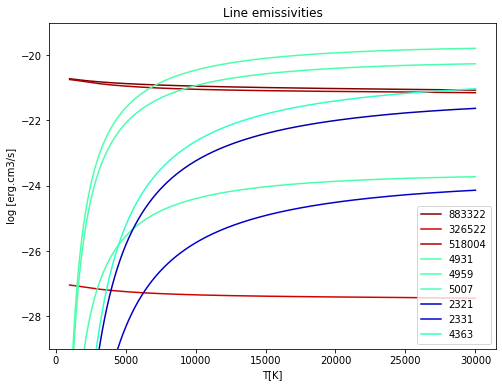

In [25]:
# We define a figure and axis objects to plot in.
f, ax = plt.subplots(figsize=(8,6))
# O3.plotEmiss? shows all the default parameters 
O3.plotEmiss(den=1e2, ax=ax)
# by default tem_min=1000, tem_max=30000, it can be changed if needed
ax.set_ylim((-29, -19)); # change the y limits on the current plot

### Which are the strongest lines at Te= 3000 K? at Te= 10000 K? at Te= 30000 K? Why?

### Do the same for	ne = 10$^5$ cm$^{-3}$. 

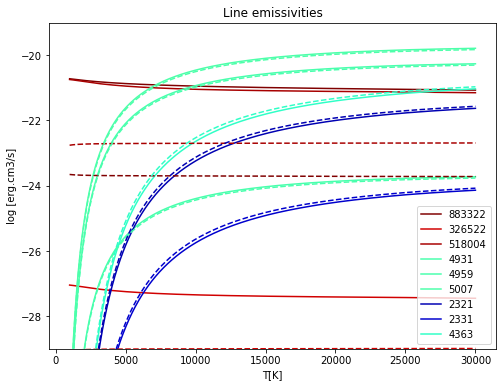

In [26]:
# We define a figure and axis objects to plot in.
f, ax = plt.subplots(figsize=(8,6))
# O3.plotEmiss? shows all the default parameters 
O3.plotEmiss(den=1e2, ax=ax)
O3.plotEmiss(den=1e5, legend=False, style='--', ax=ax) 
# by default tem_min=1000, tem_max=30000, it can be changed if needed
ax.set_ylim((-29, -19)); # change the y limits on the current plot

### What are the differences? How do they relate to the critical densities of the levels?

# Atomic data

In [27]:
O3.getOmega(tem=1e4, wave=5007) # They actually are the Upsilon from the theretical lecture, for historical reasons ;-)

1.26198

In [28]:
O3.getCollRates(tem=1e4) # q_ij

array([[0.00000000e+00, 4.60229636e-08, 2.12029826e-08, 1.16327325e-09,
        5.64645300e-12],
       [1.55928423e-08, 0.00000000e+00, 3.50416870e-08, 1.18729005e-09,
        5.76549384e-12],
       [4.43157725e-09, 2.16170122e-08, 0.00000000e+00, 1.23140193e-09,
        5.98380655e-12],
       [4.30024185e-09, 1.29543988e-08, 2.17795851e-08, 0.00000000e+00,
        3.94340547e-10],
       [2.82000047e-09, 8.49883252e-09, 1.42984724e-08, 5.32762636e-08,
        0.00000000e+00]])

In [29]:
O3.getA()

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.5960000e-05, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.0300000e-11, 9.6320000e-05, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.3220000e-06, 6.7909998e-03, 2.0460000e-02, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 2.2550000e-01, 6.9980000e-04, 1.6850000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.1910000e-03, 2.3080000e+02, 5.7650000e+02, 5.7770000e-03,
        3.7600000e-11, 0.0000000e+00]])

In [30]:
DP = pn.DataPlot('O',3,NLevels=5)

warng _ManageAtomicData: trc data not available for O3


/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/plot/plotAtomicData.py:473: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


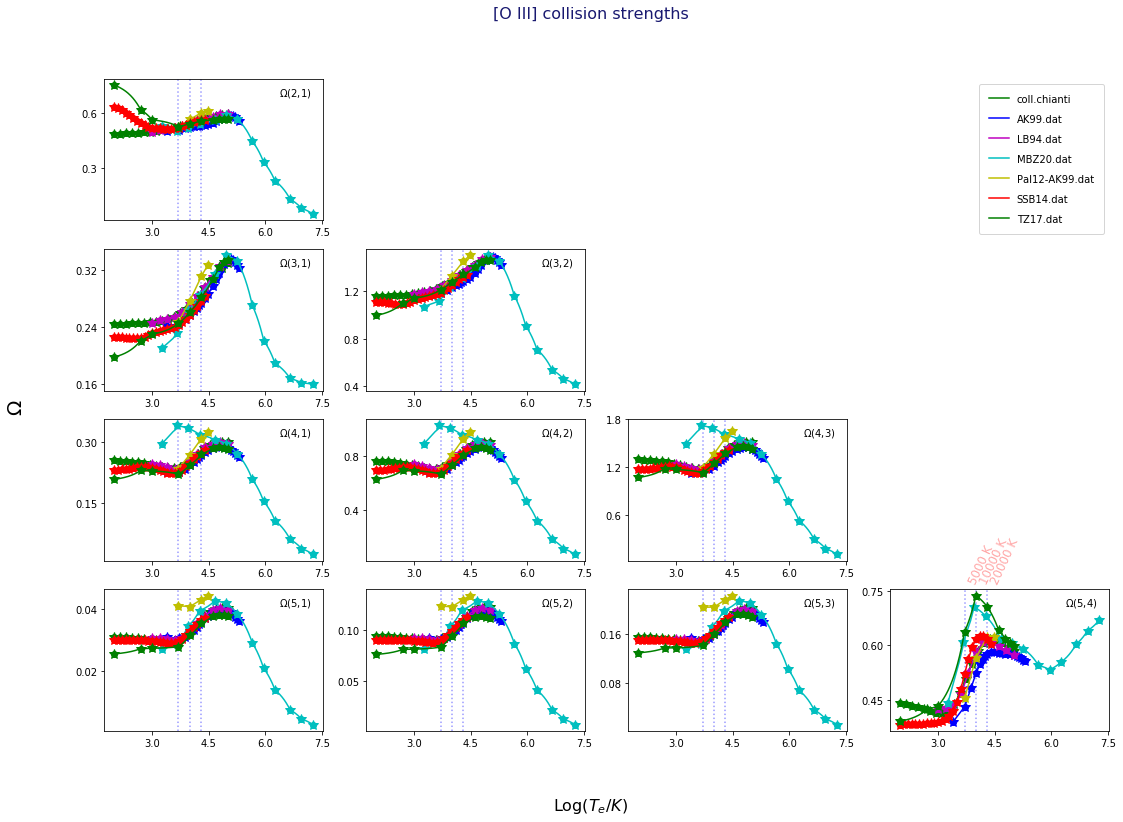

In [31]:
DP.plotOmega()

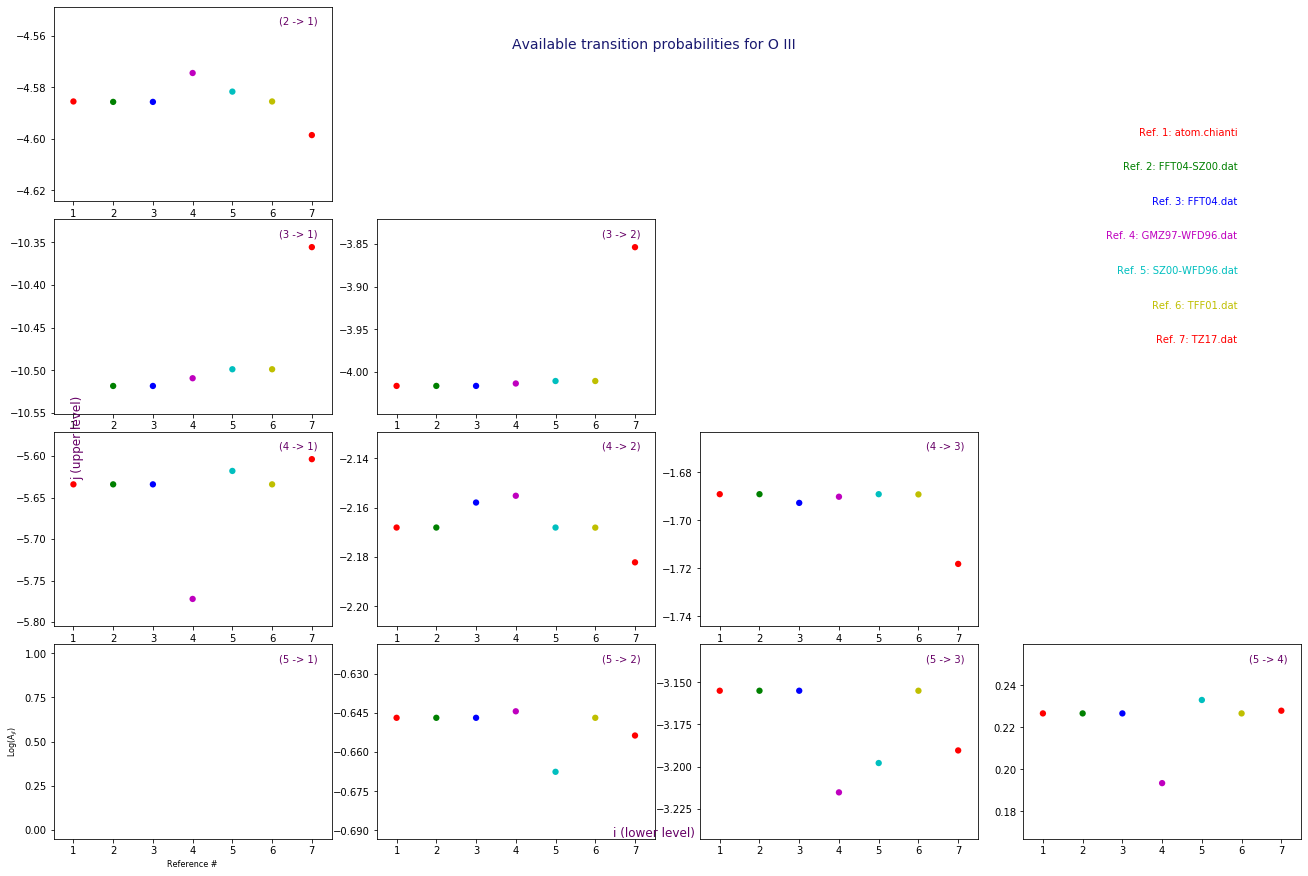

In [32]:
DP.plotAllA()

In [33]:
pn.atomicData.getAllAvailableFiles('O3')

['o_iii_atom.chianti',
 'o_iii_atom_FFT04-SZ00.dat',
 'o_iii_atom_FFT04.dat',
 'o_iii_atom_GMZ97-WFD96.dat',
 'o_iii_atom_SZ00-WFD96.dat',
 'o_iii_atom_TFF01.dat',
 'o_iii_atom_TZ17.dat',
 'o_iii_coll.chianti',
 'o_iii_coll_AK99.dat',
 'o_iii_coll_LB94.dat',
 'o_iii_coll_MBZ20.dat',
 'o_iii_coll_Pal12-AK99.dat',
 'o_iii_coll_SSB14.dat',
 'o_iii_coll_TZ17.dat',
 'o_iii_rec_P91.func']

In [34]:
pn.atomicData.setDataFile('o_iii_coll_MBZ20.dat')

In [35]:
O3_MBZ20 = pn.Atom('O', 3)

In [36]:
print(O3)
print(O3_MBZ20)

Atom O3 from o_iii_atom_FFT04-SZ00.dat and o_iii_coll_SSB14.dat
Atom O3 from o_iii_atom_FFT04-SZ00.dat and o_iii_coll_MBZ20.dat


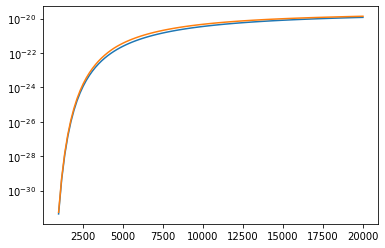

In [37]:
tem = np.linspace(1e3, 2e4, 100)
f, ax = plt.subplots()
ax.plot(tem,O3.getEmissivity(tem, den=1e2, wave=5007),label=O3.collFile)
ax.plot(tem,O3_MBZ20.getEmissivity(tem, den=1e2, wave=5007), label=O3_MBZ20.collFile)
ax.set_yscale('log')

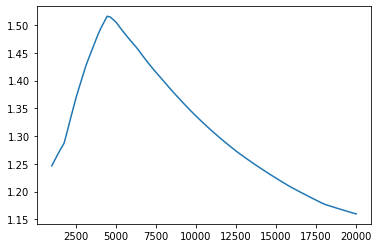

In [38]:
tem = np.linspace(1e3, 2e4, 100)
f, ax = plt.subplots()
ax.plot(tem,O3_MBZ20.getEmissivity(tem, den=1e2, wave=5007) / O3.getEmissivity(tem, den=1e2, wave=5007))

### What could be the consequences of changing $\Omega$(5007) by 50% ?